In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr 
wr.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [14]:
df_cancelled = pd.read_excel('aspiranet_Data/Cancelled.xlsx')
df_cancelled.drop('Religion', axis=1)

,OptionsNumber,StartDate,Duration,AppointmentStatus,AgeAtAppointment,Gender,Ethnicity,PrimaryLanguage,County
0,89175,2021-07-01 01:00:00,61,No Show/Client,17,M,Black,English,Los Angeles
1,61751,2021-07-01 08:00:00,90,Provider Cx,27,F,Hispanic/Latino,Spanish,Ventura
2,62043,2021-07-01 08:45:00,120,No Show/Client,17,F,White,English,Stanislaus
3,57251,2021-07-01 09:00:00,120,Other Agency Cxl,16,M,Hispanic/Latino,English,Merced
4,60712,2021-07-01 09:00:00,60,Provider Cx,1,M,Hispanic/Latino,English,Stanislaus
...,...,...,...,...,...,...,...,...,...
52628,91696,2024-06-28 16:15:00,0,Client Cx,8,F,White,English,Kern
52629,90917,2024-06-28 16:30:00,60,No Show/Client,15,F,Hispanic/Latino,English,Tulare
52630,68578,2024-06-28 17:30:00,0,Client Cx,15,F,Hispanic/Latino,English,Ventura
52631,89046,2024-06-28 17:30:00,60,Provider Cx,8,M,White,English,Stanislaus


(array([7.7530e+03, 2.4870e+04, 1.9644e+04, 1.0100e+02, 1.7000e+02,
        7.1000e+01, 1.4000e+01, 9.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0. ,  7.4, 14.8, 22.2, 29.6, 37. , 44.4, 51.8, 59.2, 66.6, 74. ]),
 <BarContainer object of 10 artists>)

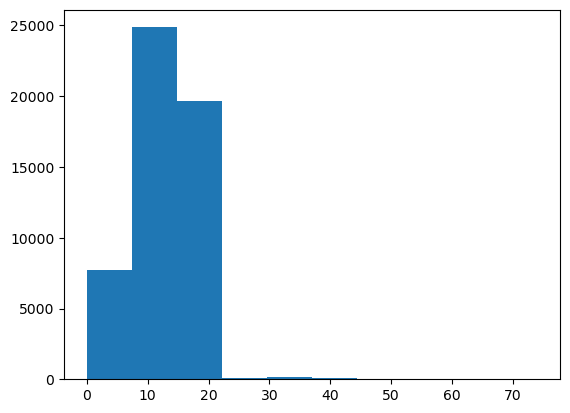

In [17]:
plt.hist(df_cancelled['AgeAtAppointment'])

In [20]:
# Age values to check: what the ages of the kids?
df_cancelled[df_cancelled['AgeAtAppointment'] < 5]

,OptionsNumber,StartDate,Duration,AppointmentStatus,AgeAtAppointment,Gender,Ethnicity,PrimaryLanguage,Religion,County
4,60712,2021-07-01 09:00:00,60,Provider Cx,1,M,Hispanic/Latino,English,[Not Entered],Stanislaus
15,60222,2021-07-01 11:00:00,45,Provider Cx,4,F,No Preference,English,[Not Entered],Merced
22,91154,2021-07-01 11:30:00,95,Late Cxl,3,M,Black,English,[Not Entered],Fresno
38,61557,2021-07-01 14:00:00,75,Provider Cx,4,F,American Indian,English,[Not Entered],Kings
70,60600,2021-07-02 09:30:00,120,Client Cx,4,M,No Preference,English,[Not Entered],Merced
...,...,...,...,...,...,...,...,...,...,...
52353,67012,2024-06-26 11:00:00,5,Client Cx,2,M,No Preference,English,[Not Entered],Ventura
52503,64806,2024-06-27 14:30:00,60,Other Agency Cxl,1,M,Hispanic/Latino,Spanish,[Not Entered],Merced
52563,67431,2024-06-28 11:00:00,60,Client Cx,2,M,Other Pacific Islander,English,[Not Entered],Merced
52564,67432,2024-06-28 11:00:00,60,Client Cx,0,F,Other Asian,English,[Not Entered],Merced


In [22]:
monthly_cancellations = df_cancelled.groupby(df_cancelled['StartDate'].dt.to_period('M')).size()
df_cancelled['Month'] = df_cancelled['StartDate'].dt.to_period('M')

In [23]:
df_grouped = df_cancelled.groupby(['Month', 'AppointmentStatus']).size().unstack().fillna(0)

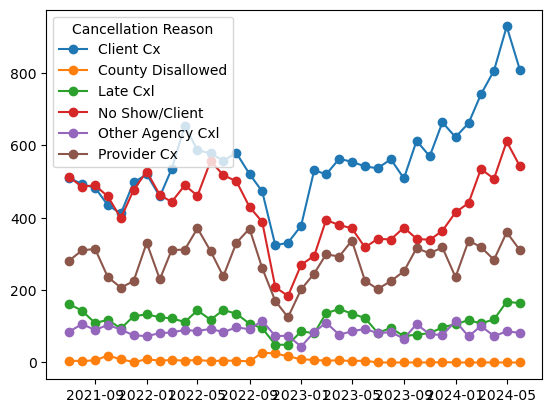

In [45]:
for appointment in df_grouped.columns:
    plt.plot(df_grouped.index.to_timestamp(), df_grouped[appointment], marker='o', label=appointment)


plt.legend(title='Cancellation Reason')
plt.show()

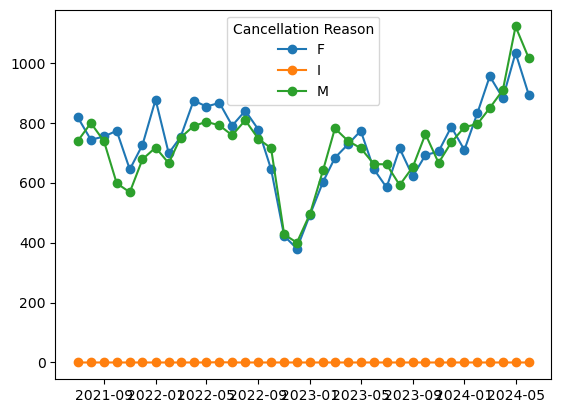

In [49]:
df_grouped_gender = df_cancelled.groupby(['Month', 'Gender']).size().unstack().fillna(0)
for gender in df_grouped_gender.columns:
    plt.plot(df_grouped_gender.index.to_timestamp(), df_grouped_gender[gender], marker='o', label=gender)


plt.legend(title='Cancellation Reason')
plt.show()

In [71]:
# Merced and Stanislaus 50% of cancellations
counties = df_cancelled['County'].value_counts()
counties.head(10)
counties_percentage = counties / counties.sum()

In [95]:
cancelations_per_person = df_cancelled['OptionsNumber'].value_counts()
df_cancelled['OptionsNumber'].count()/df_cancelled['OptionsNumber'].nunique()

9.174307129161583

In [92]:
count_greater_than_one = (cancelations_per_person > 1).sum()

In [110]:
cancelations_per_person.mean()
df_cancelled['OptionsNumber'].nunique()

5737

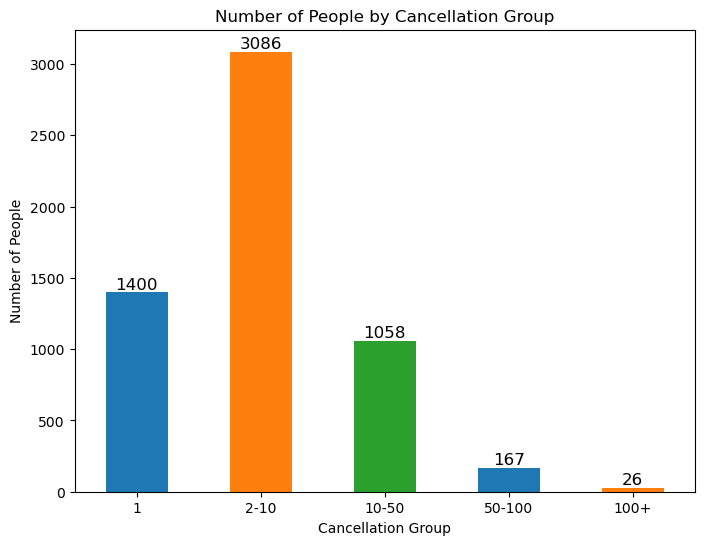

In [109]:
grouped_cancelations = pd.Series({
    '1': (cancelations_per_person == 1).sum(),
    '2-10': ((cancelations_per_person > 1) & (cancelations_per_person <= 10)).sum(),
    '10-50': ((cancelations_per_person > 10) & (cancelations_per_person <= 50)).sum(),
    '50-100': ((cancelations_per_person > 50) & (cancelations_per_person <= 100)).sum(),
    '100+': (cancelations_per_person > 100).sum()
})

# Step 2: Plot the grouped data
plt.figure(figsize=(8, 6))
grouped_cancelations.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel("Cancellation Group")
plt.ylabel("Number of People")
plt.title("Number of People by Cancellation Group")
plt.xticks(rotation=0)

for index, value in enumerate(grouped_cancelations):
    plt.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=12)

plt.show()


In [111]:
df_incidents = pd.read_excel('aspiranet_Data/Incidents.xlsx')

In [126]:
df_incidents

,IncidentDate,IncidentTypeCode,IncidentType,SubTypeCode,IncidentSubType,OptionsNumber,AgeAtIncident,Gender,Ethnicity,PrimaryLanguage,Religion,ServiceDivision,CountyOService
0,2022-02-01,6,Epidemic Outbreak,NaN,NaN,77036,13,F,White,English,Non-Denominational,Foster Care,FRESNO DSS
1,2022-11-26,6,Epidemic Outbreak,NaN,NaN,77036,13,F,White,English,Non-Denominational,Foster Care,FRESNO DSS
2,2022-11-26,6,Epidemic Outbreak,NaN,NaN,77037,15,F,White,English,No Preference,Foster Care,FRESNO DSS
3,2022-02-01,6,Epidemic Outbreak,NaN,NaN,77037,14,F,White,English,No Preference,Foster Care,FRESNO DSS
4,2022-07-06,2,Unusual Incident,5.0,ER Visit,78745,13,F,Hispanic/Latino,English,No Preference,Foster Care,FRESNO DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2023-01-25,20,12. Suicide Talk - screening,NaN,NaN,90893,10,M,White,English,[Not Entered],Wraparound,WRAP - Kern Kaiser
6489,2023-01-24,18,11. Suspected Child Abuse (CPS) Report,NaN,NaN,90826,17,F,White,English,[Not Entered],Wraparound,WRAP - Tulare WRAP Mental Health
6490,2023-01-26,55,Suicide,132.0,Talk,100019,19,U,[Not Entered],[Not Entered],[Not Entered],Transitional,L.A. DSS
6491,2023-02-09,58,Unusual Incident,149.0,Other,100024,19,F,Black,English,No Preference,Transitional,STANISLAUS DSS


In [127]:
df_incidents_per_person = df_incidents['OptionsNumber'].value_counts()
top_10_options = df_incidents_per_person.head(10).index
df_top_incidents = df_incidents[df_incidents['OptionsNumber'].isin(top_10_options)]
df_top_incidents

,IncidentDate,IncidentTypeCode,IncidentType,SubTypeCode,IncidentSubType,OptionsNumber,AgeAtIncident,Gender,Ethnicity,PrimaryLanguage,Religion,ServiceDivision,CountyOService
913,2022-01-05,12,Unusual Incident,35.0,Medication Refusal,88719,16,M,White,English,No Preference,Residential,SACRAMENTO DSS
914,2021-10-20,12,Unusual Incident,45.0,Aggressive Act/Another Client,88719,16,M,White,English,No Preference,Residential,SACRAMENTO DSS
915,2021-12-12,12,Unusual Incident,35.0,Medication Refusal,88719,16,M,White,English,No Preference,Residential,SACRAMENTO DSS
916,2021-11-12,12,Unusual Incident,45.0,Aggressive Act/Another Client,88719,16,M,White,English,No Preference,Residential,SACRAMENTO DSS
917,2021-08-09,12,Unusual Incident,36.0,Other,88719,16,M,White,English,No Preference,Residential,SACRAMENTO DSS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,2023-01-30,12,Unusual Incident,48.0,Alleged Violation of Rights,90168,15,M,White,English,No Preference,Residential,SACRAMENTO DSS
6458,2023-01-28,12,Unusual Incident,37.0,Physical Hold,90168,15,M,White,English,No Preference,Residential,SACRAMENTO DSS
6459,2023-01-30,63,AWOL,183.0,Returned,90168,15,M,White,English,No Preference,Residential,SACRAMENTO DSS
6460,2023-01-27,69,Medication,203.0,Refusal,90168,15,M,White,English,No Preference,Residential,SACRAMENTO DSS


In [125]:
df_incidents_person = df_incidents['OptionsNumber'].value_counts().mean()


3.067076051015588

In [145]:
# incidents by time

def classify_incident(incident):
    if 'Self-Harm' in incident or 'Suicide' in incident:
        return 'Self-Harm and Suicide-related Incidents'
    elif 'Injury' in incident:
        return 'Injuries'
    elif 'Medical' in incident or 'Medication' in incident:
        return 'Health-related Incidents'
    elif 'Abuse' in incident:
        return 'Abuse and Neglect'
    elif 'Epidemic' in incident or 'Infection Control' in incident:
        return 'Epidemic and Infectious Disease'
    elif 'Police' in incident or 'Arrested' in incident:
        return 'Criminal or Legal Issues'
    elif 'Death' in incident:
        return 'Death-related Incidents'
    elif 'Absence' in incident or 'AWOL' in incident:
        return 'Incidents Involving Absence or AWOL'
    elif 'Placement Change' in incident:
        return 'Placement-related Incidents'
    else:
        return 'Miscellaneous and Other Incidents'

# Apply the classification function to the 'IncidentType' column
df_incidents['Incident_Category'] = df_incidents['IncidentType'].apply(classify_incident)


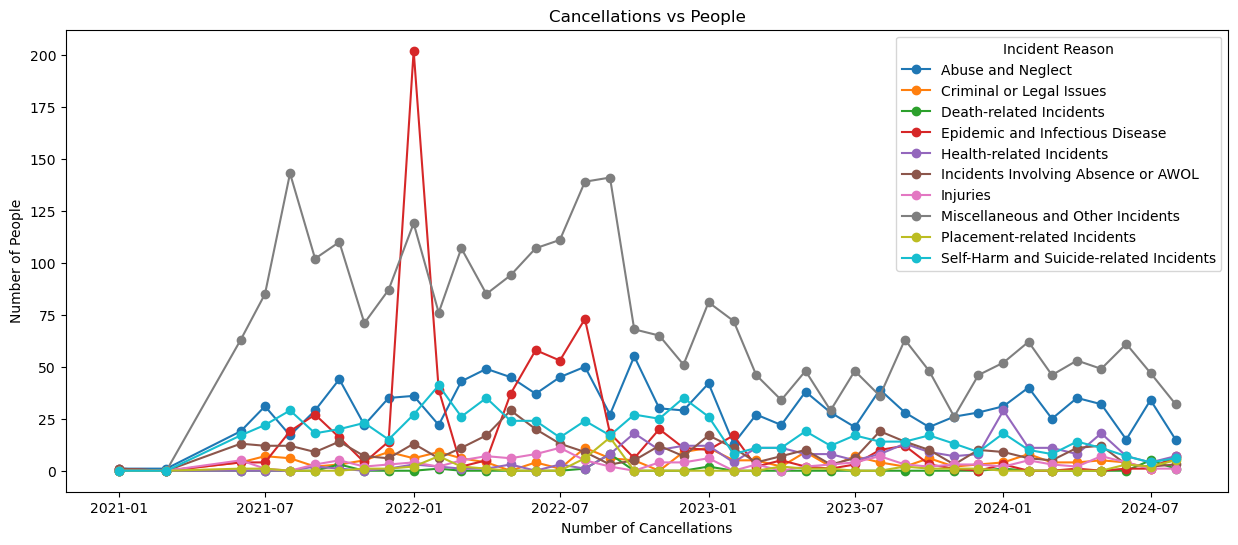

In [151]:
monthly_incidents = df_incidents.groupby(df_incidents['IncidentDate'].dt.to_period('M')).size()
df_incidents['Month'] = df_incidents['IncidentDate'].dt.to_period('M')
df_grouped_inc = df_incidents.groupby(['Month', 'Incident_Category']).size().unstack().fillna(0)

plt.figure(figsize=(15, 6)) 
for inc in df_grouped_inc.columns:
    plt.plot(df_grouped_inc.index.to_timestamp(), df_grouped_inc[inc], marker='o', label=inc)


# Adding labels and title
plt.xlabel('Number of Cancellations')
plt.ylabel('Number of People')
plt.title('Cancellations vs People')
plt.legend(title='Incident Reason')

# Show the plot
plt.show()


In [ ]:
# Understand new data set

# Calculate cancellation rate? 

# Number of cancelations has decread
